Cricket Rating Score Predictor of Different players

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn is a Python library that is based on matplotlib and is used for data visualization. It provides a medium to present data in a statistical graph format as an informative and attractive medium to impart some information

In [2]:
train=pd.read_csv("/content/tr1 (1).csv")
test=pd.read_csv("/content/ts (1).csv")

In [3]:
train.shape

(1747, 17)

In [4]:
test.shape

(746, 16)

In [5]:
train.head()

,ID,Name,Age,100s,50s,6s,Balls,Balls Faced,Bat_Average,Bowl_Strike_rate,Economy_Rate,Innings,Maidens,Overs,Runs,Wickets,Ratings
0,0,Terrence Duffin,36.0,136,3.0,0.0,5,994,23.74,48.979948,5.26476,319.0,1585.0,1,693,77.0,126
1,1,Keith W R Fletcher,74.0,23,5.0,6.0,240,1134,39.84,48.979948,5.26476,31.0,70.0,424,792,165.0,194
2,2,Muttiah Muralitharan,46.0,140,0.0,12.0,18994,869,6.81,35.230000,3.93000,343.0,996.0,3071,751,496.0,697
3,3,Wasim Akram,52.0,115,6.0,121.0,18343,4210,16.52,36.230000,3.90000,113.0,251.0,3280,3593,406.0,790
4,4,Waqar Younis,47.0,25,0.0,21.0,12816,1445,10.31,30.520000,4.69000,149.0,476.0,1815,907,252.0,564


In [6]:
test.head()

,ID,Name,Age,100s,50s,6s,Balls,Balls Faced,Bat_Average,Bowl_Strike_rate,Economy_Rate,Innings,Maidens,Overs,Runs,Wickets
0,1747,Richard A Austin,7,40,0.0,0.0,163,13.0,8.00,63.287186,13,15,3,185.76,20.0,54
1,1748,Angelo Kanishka Perera,29,63,0.0,0.0,130,21.0,4.00,36.377186,5.5,167,53,131.86,28.0,204
2,1749,Vikram R Singh,34,27,0.0,0.0,18960,13.0,8.00,35.627186,8.75,246,205,130.16,217.0,373
3,1750,David S Steele,77,24,0.0,0.0,18261,12.0,8.00,65.457186,9,316,256,NaN,263.0,248
4,1751,Alam Talukdar,50,40,0.0,0.0,12699,16.0,10.52,68.957186,5.14,5,165,196.96,150.0,186


In [7]:
tr=train.drop(["Name","ID"],axis=1)
te=test.drop(["Name","ID"],axis=1)


In [8]:
#total null values in each column
tr.isnull().sum()

Age                 0
100s                0
50s                 1
6s                  2
Balls               0
Balls Faced         0
Bat_Average         0
Bowl_Strike_rate    0
Economy_Rate        2
Innings             1
Maidens             1
Overs               0
Runs                0
Wickets             2
Ratings             0
dtype: int64

In [9]:
tr=tr[~tr['Innings'].isna()]
tr=tr[~tr['Economy_Rate'].isna()]

tr.fillna(0,inplace=True)



In [10]:
tr.isnull().sum()

Age                 0
100s                0
50s                 0
6s                  0
Balls               0
Balls Faced         0
Bat_Average         0
Bowl_Strike_rate    0
Economy_Rate        0
Innings             0
Maidens             0
Overs               0
Runs                0
Wickets             0
Ratings             0
dtype: int64

In [11]:
te.isnull().sum()

Age                   5
100s                  0
50s                   4
6s                    4
Balls                 9
Balls Faced           7
Bat_Average           6
Bowl_Strike_rate      6
Economy_Rate        213
Innings               3
Maidens               1
Overs                23
Runs                 11
Wickets               0
dtype: int64

In [12]:
te=te[~te['Age'].isna()]
te=te[~te['Economy_Rate'].isna()]
te=te[~te['Innings'].isna()]
te=te[~te['Overs'].isna()]
te=te[~te['Runs'].isna()]
te=te[~te['Bat_Average'].isna()]
te=te[~te['Balls Faced'].isna()]
te=te[~te['Balls'].isna()]
te=te[~te['Bowl_Strike_rate'].isna()]



In [13]:
te.fillna(0,inplace=True)

In [14]:
te.isnull().sum()

Age                 0
100s                0
50s                 0
6s                  0
Balls               0
Balls Faced         0
Bat_Average         0
Bowl_Strike_rate    0
Economy_Rate        0
Innings             0
Maidens             0
Overs               0
Runs                0
Wickets             0
dtype: int64

In [15]:
tr=tr[tr['Age']>15]
tr=tr[tr['Balls']>100]
tr=tr[tr['Balls Faced']>30]
tr=tr[tr['Bat_Average']>5]
tr=tr[tr['Bowl_Strike_rate']>25]
tr=tr[tr['Overs']>25]
tr=tr[tr['Runs']>25]
tr=tr[tr['Ratings']>0]



In [16]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 1 to 1742
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               855 non-null    float64
 1   100s              855 non-null    int64  
 2   50s               855 non-null    float64
 3   6s                855 non-null    float64
 4   Balls             855 non-null    int64  
 5   Balls Faced       855 non-null    int64  
 6   Bat_Average       855 non-null    float64
 7   Bowl_Strike_rate  855 non-null    float64
 8   Economy_Rate      855 non-null    float64
 9   Innings           855 non-null    float64
 10  Maidens           855 non-null    float64
 11  Overs             855 non-null    int64  
 12  Runs              855 non-null    int64  
 13  Wickets           855 non-null    float64
 14  Ratings           855 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 106.9 KB


In [17]:
te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 745
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               492 non-null    object 
 1   100s              492 non-null    object 
 2   50s               492 non-null    float64
 3   6s                492 non-null    float64
 4   Balls             492 non-null    object 
 5   Balls Faced       492 non-null    float64
 6   Bat_Average       492 non-null    float64
 7   Bowl_Strike_rate  492 non-null    float64
 8   Economy_Rate      492 non-null    object 
 9   Innings           492 non-null    object 
 10  Maidens           492 non-null    object 
 11  Overs             492 non-null    float64
 12  Runs              492 non-null    float64
 13  Wickets           492 non-null    int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 57.7+ KB


In [18]:
te['Age'].unique()

array(['7', '29', '34', '50', '38', '37', '40', '39', '24', '46', '4',
       '20', '27', '31', '72', '65', '56', '41', '23', '33', '73', '57',
       '28', '35', '48', '69', '36', '49', '26', '19', '53', '45', '54',
       '59', '14', '71', '79', '21', '67', '25', '51', '60', '47', '32',
       '30', '42', '55', '43', '22', '75', '61', '64', '63', '68', '58',
       '12', '52', '76', '74', '66', '62', '81', '70', '11', '78', '77',
       '44', '15', 'None'], dtype=object)

In [19]:
#Pick rows in which age has numeric values
te=te[te['Age'].str.isnumeric()]

In [20]:
te['Age']=te['Age'].astype(float)

In [21]:
te['100s'].unique()

array(['40', '63', '27', '84', '87', '69', '72', '12', '141', '44', '34',
       '74', '126', '36', '86', '38', '137', '47', '96', '13', '56',
       '127', '0', '98', '81', '119', '43', '49', '125', '33', '22',
       '121', '114', '123', '99', '67', '18', '28', '92', '39', '3', '66',
       '75', '45', '52', '115', '111', '144', '80', '46', '85', '132',
       '50', '140', '17', '129', '89', '103', '23', '120', '112', '142',
       '124', '116', '29', '108', '109', '70', '130', '64', '15', '53',
       '41', '26', '25', '136', '73', '148', '19', '101', '88', '78', '6',
       '7', '37', '42', '31', '122', '9', '95', '117', '1', '24', '104',
       '30', '5', '131', '58', '113', '149', '32', '60', '55', '133',
       '105', '139', '147', '138', '20', '83', '100', '54', '35', '51',
       '4', '146', '106', '97', '68', '134', '91', '8', '61', '90', '110',
       '10', '94', 'None', '71', '2', '128', '118', '82', '77', '107',
       '59', '145', '62', '135', '143', '93', '65', '21', '79

In [22]:
te['100s']=te['100s'].str.replace('None','0').astype(int)

In [23]:
te['Balls'].unique()

array(['163', '130', '18960', '12699', '15853', '15760', '13045', '11284',
       '14679', '15024', '10423', '11935', '14169', '10814', '8957',
       '10206', '10940', '8664', '11060', '12668', '9636', '10424',
       '11370', '9966', '9556', '7573', '8665', '10868', '9541', '10725',
       '7536', '8352', '6704', '8441', '8166', '8911', '6309', '9659',
       '7477', '5847', '6652', '6967', '6056', '8198', '6142', '6152',
       '5846', '7085', '5725', '6553', '7389', '5262', '7562', '6293',
       '6530', '7287', '5920', '8025', '5652', '8057', '4881', '6326',
       '6029', '4488', '4392', '5430', '5730', '5655', '6123', '7090',
       '7587', '6216', '4782', '4729', '6106', '8747', '5173', '5660',
       '6639', '4274', '4509', '4684', '6521', '6297', '4477', '4387',
       '4450', '4837', '2879', '5732', '4505', '3990', '4040', '3869',
       '5480', '5229', '4574', '4995', '3591', '4388', '5926', '3891',
       '3795', '3411', '3626', '3476', '4453', '4666', '5345', 'None',
    

In [24]:
te=te[te['Balls'].str.isnumeric()]


In [25]:
te['Balls']=te['Balls'].astype(int)

In [26]:
te['Economy_Rate'].unique()

array(['13', '5.5', '8.75', '5.14', '4', '4.2', '4.71', '3.94', '5.33',
       '5.64', '3.67', '6.7', '9.5', '4.62', '2', '3', '8', '6.65',
       '6.48', '6.43', '3.1', '5.17', '6.75', '12', '8.5', '0', '4.6',
       '5.06', '6.83', '6.63', '4.75', '6.4', '6.8', '8.17', '6.71',
       '6.88', '6.67', '3.36', '7.67', '11', '5.67', '4.94', '7', '7.76',
       '6.17', '6.55', '5.81', '3.78', '4.17', '7.13', '6', '6.23', '7.6',
       '5.9', '7.86', '4.63', '7.25', '6.5', '8.33', '3.83', '5.75',
       '6.58', '10.5', '4.78', '5.83', '10', '10.68', '12.68', '8.36',
       '7.01', '3.25', '1.96', '5.36', '8.964', '9.56', '17.38', '16.78',
       '9.756', '19.785', '0.3654', '4.65', '5.52', '4.15', '4.7', '5.13',
       '4.3352', '7.95', '8.95', '5.8', '9.35', '7.98', '5.68', '8.068',
       '9.13', '5.78', '0.354', '9.45', '1.035', '16.59', '8.49', '9.26',
       '8.48', '10.66', '8.19', '9.79', '6.78', '9.34', '8.16', '8.67',
       '10.565', '7.297', '8.246', '9.065', '4.79', '5.16', '9.

In [27]:
te['Economy_Rate']=te['Economy_Rate'].astype(str)
te=te[te['Economy_Rate'].str.isnumeric()]


In [28]:
te['Economy_Rate']=te['Economy_Rate'].astype(float)

In [29]:
te['Innings'].unique()
te['Innings']=te['Innings'].astype(str)
te=te[te['Innings'].str.isnumeric()]
te['Innings']=te['Innings'].astype(float)


In [30]:
te['Maidens'].unique()
te['Maidens']=te['Maidens'].astype(str)
te=te[te['Maidens'].str.isnumeric()]
te['Maidens']=te['Maidens'].astype(float)
te['Balls Faced']=te['Maidens'].astype(int)
te['Overs']=te['Overs'].astype(int)

In [31]:
te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 431
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               18 non-null     float64
 1   100s              18 non-null     int64  
 2   50s               18 non-null     float64
 3   6s                18 non-null     float64
 4   Balls             18 non-null     int64  
 5   Balls Faced       18 non-null     int64  
 6   Bat_Average       18 non-null     float64
 7   Bowl_Strike_rate  18 non-null     float64
 8   Economy_Rate      18 non-null     float64
 9   Innings           18 non-null     float64
 10  Maidens           18 non-null     float64
 11  Overs             18 non-null     int64  
 12  Runs              18 non-null     float64
 13  Wickets           18 non-null     int64  
dtypes: float64(9), int64(5)
memory usage: 2.1 KB


In [32]:
tr.describe()

,Age,100s,50s,6s,Balls,Balls Faced,Bat_Average,Bowl_Strike_rate,Economy_Rate,Innings,Maidens,Overs,Runs,Wickets,Ratings
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,43.019234,75.788304,5.316959,14.109942,1891.776608,1367.312281,20.314398,49.551844,5.033360,299.359064,776.395322,378.695906,1078.347368,190.377778,202.325146
std,12.884507,43.537766,12.004152,29.874242,2536.757651,2488.390772,11.098691,20.493008,1.574275,221.372652,604.767324,415.756610,1956.382490,149.969923,117.502412
min,18.000000,0.000000,0.000000,0.000000,102.000000,31.000000,5.170000,25.200000,0.000000,0.000000,0.000000,26.000000,26.000000,0.000000,15.000000
25%,33.000000,39.000000,0.000000,1.000000,356.000000,137.500000,11.710000,38.240000,4.400000,129.000000,299.500000,128.000000,141.500000,73.000000,126.000000
50%,41.000000,74.000000,0.000000,3.000000,928.000000,395.000000,17.820000,45.480000,4.880000,258.000000,665.000000,244.000000,351.000000,158.000000,174.000000
75%,52.000000,115.000000,4.000000,13.000000,2340.500000,1227.500000,27.035000,53.405000,5.430000,435.500000,1125.000000,457.500000,911.500000,283.500000,249.500000
max,82.000000,183.000000,96.000000,314.000000,18994.000000,21367.000000,97.000000,201.000000,26.000000,1160.000000,3519.000000,3280.000000,18194.000000,894.000000,844.000000


In [33]:
#removing outliers
tr=tr[tr['Age']<=80].reset_index(drop=True)

In [34]:
tr=tr[tr['6s']<=200].reset_index(drop=True)

In [35]:
tr=tr[tr['Bowl_Strike_rate']<=200].reset_index(drop=True)

In [36]:
tr=tr[tr['Overs']<=3000].reset_index(drop=True)

In [37]:
tr=tr[tr['Runs']<=11000].reset_index(drop=True)

In [38]:
tr=tr[tr['Ratings']<=600].reset_index(drop=True)

In [39]:
#tr.to_csv('Cleantraining.csv')

A heatmap is one of the components supported by seaborn where variation in related data is portrayed using a color palette.

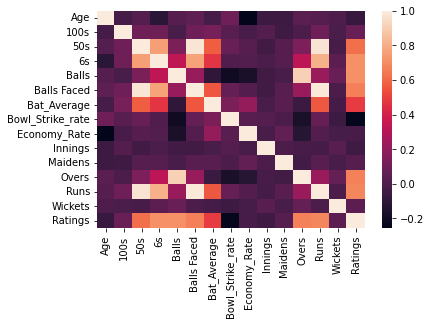

In [40]:
sns.heatmap(tr.corr())

In [ ]:
#'runs' is highly corelated to '50s' so remove 50s column

In [42]:
tr=tr.drop("50s",axis=1)
te=te.drop("50s",axis=1)
tr=tr.drop("Balls Faced",axis=1)
te=te.drop("Balls Faced",axis=1)


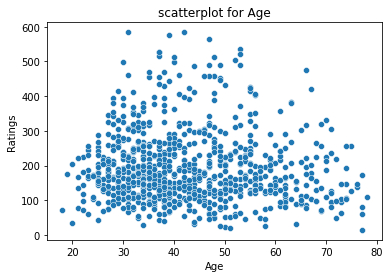

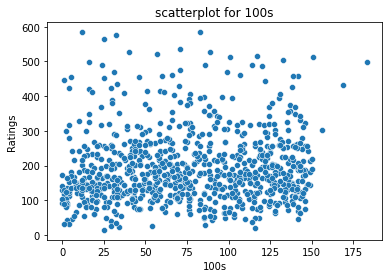

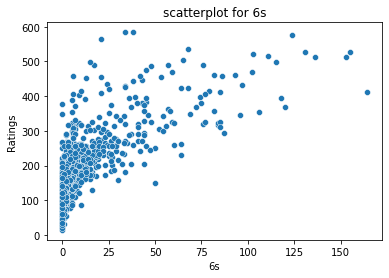

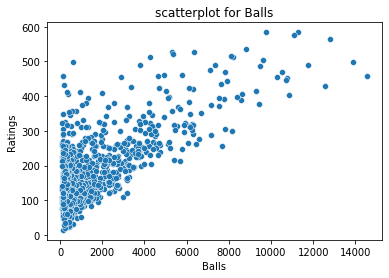

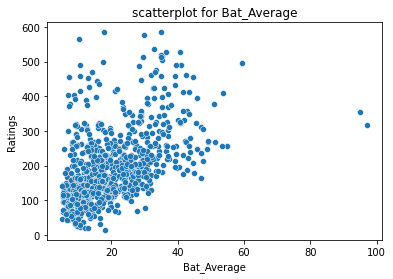

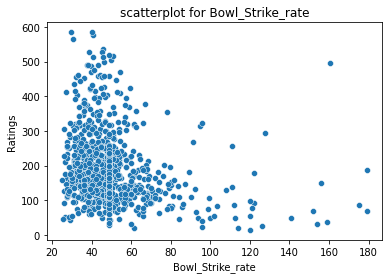

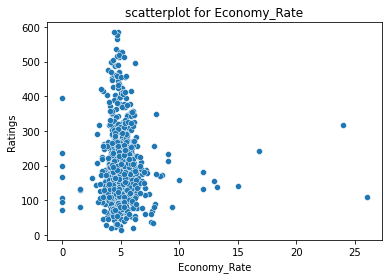

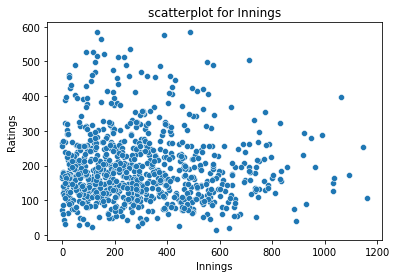

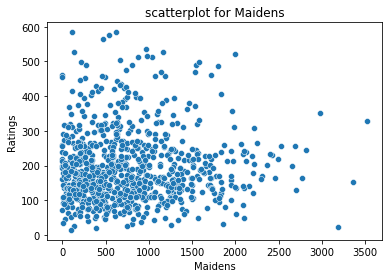

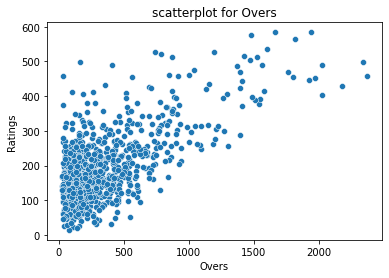

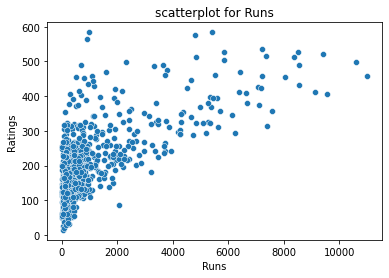

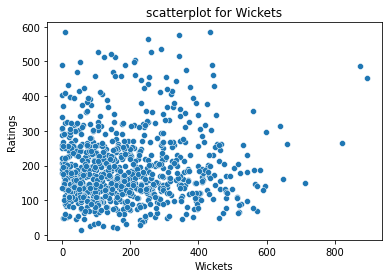

In [43]:
for col in tr.columns: 
 if col=="ID" or col=="Ratings":
  print("")
 else:
  sns.scatterplot(x=col, y='Ratings', data=tr)
  plt.title('scatterplot for {}'.format(col))
  plt.show();

In [44]:
x_tr=tr.iloc[:,1:-1].values
y_tr=tr.iloc[:,-1].values


In [45]:
x_tr

array([[2.3000e+01, 6.0000e+00, 2.4000e+02, ..., 4.2400e+02, 7.9200e+02,
        1.6500e+02],
       [2.5000e+01, 2.1000e+01, 1.2816e+04, ..., 1.8150e+03, 9.0700e+02,
        2.5200e+02],
       [8.3000e+01, 3.4000e+01, 1.1283e+04, ..., 1.9410e+03, 9.7400e+02,
        4.3300e+02],
       ...,
       [6.9000e+01, 0.0000e+00, 3.0500e+02, ..., 2.1800e+02, 4.4000e+01,
        9.0000e+00],
       [8.6000e+01, 0.0000e+00, 1.8500e+02, ..., 5.9000e+01, 1.4700e+02,
        2.2800e+02],
       [3.2000e+01, 0.0000e+00, 2.5400e+02, ..., 9.4000e+01, 2.4900e+02,
        1.0400e+02]])

In [48]:
x_te=te.iloc[:,1:].values
x_te

array([[4.00000000e+01, 0.00000000e+00, 1.63000000e+02, 8.00000000e+00,
        6.32871862e+01, 1.30000000e+01, 1.50000000e+01, 3.00000000e+00,
        1.85000000e+02, 2.00000000e+01, 5.40000000e+01],
       [8.40000000e+01, 0.00000000e+00, 1.58530000e+04, 7.00000000e+00,
        4.92071862e+01, 4.00000000e+00, 8.00000000e+00, 2.99000000e+02,
        1.57000000e+02, 2.89000000e+02, 3.96000000e+02],
       [8.60000000e+01, 0.00000000e+00, 8.66400000e+03, 4.00000000e+00,
        4.87071862e+01, 2.00000000e+00, 1.26000000e+02, 1.41000000e+02,
        1.56000000e+02, 1.07000000e+02, 2.95000000e+02],
       [3.80000000e+01, 0.00000000e+00, 1.10600000e+04, 2.00000000e+00,
        3.92071862e+01, 3.00000000e+00, 2.98000000e+02, 1.52000000e+02,
        1.37000000e+02, 1.11000000e+02, 3.50000000e+02],
       [1.37000000e+02, 0.00000000e+00, 1.26680000e+04, 4.00000000e+00,
        6.18771862e+01, 8.00000000e+00, 3.30000000e+02, 1.00000000e+02,
        1.82000000e+02, 9.60000000e+01, 2.57000000e+

the limitation of train test split method is we get different values of training and testing set every time thus different value of score

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_tr,y_tr,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
modlr=LinearRegression()
modlr.fit(xtrain,ytrain)
modlr.score(xtest,ytest)


0.9253138029460664

In [51]:
modlr.predict(x_te)

array([ 71.24919362, 490.94071768, 294.12577141, 355.51098841,
       385.91400601, 282.7966293 , 338.55021529, 218.09633954,
       212.59065056, 290.94772941, 265.63789172, 215.56948132,
       245.5493465 , 218.43044582, 264.91098557, 435.6190378 ,
       112.21081153,  44.83264542])

In [54]:
l1=[40,0,163,8,63.2871,13,15,3,185,20,54]
v1 = np.array(l1)
v1.reshape(1,-1)
modlr.predict([v1])

array([71.24927257])

K fold cross validation

In [ ]:
#from sklearn.model_selection import KFold
#folds=KFold(n_splits=10)

In [55]:
from sklearn.model_selection import KFold
folds=KFold(n_splits=10)
def get_score(model,xtrain,xtest,ytrain,ytest):
 model.fit(xtrain,ytrain)
 return model.score(xtest,ytest)

scores_lr=[]
for train_index,test_index in folds.split(x_tr):
  x_train,x_test,y_train,y_test = x_tr[train_index],x_tr[test_index],y_tr[train_index],y_tr[test_index]
  scores_lr.append(get_score(LinearRegression(),x_train,x_test,y_train,y_test))
scores_lr  
  

[0.7884600745176286,
 0.8763694694940857,
 0.8361016782403674,
 0.8923029696560876,
 0.8300117327481494,
 0.8532317871918798,
 0.8595678132629899,
 0.8840350412759618,
 0.8204487037045702,
 0.5916263288672985]

In [56]:
#calculating score using function for cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x_tr,y_tr)


array([0.8413371 , 0.86552379, 0.84144493, 0.86893707, 0.68573844])

Linear Regressor without function

In [101]:
#xx_tr=tr.iloc[:,1:-1]
#yy_tr=tr.iloc[:,-1]


In [113]:
x_trr= (x_tr - x_tr.mean())/x_tr.std()
x_trr


array([[-0.38447472, -0.4013082 , -0.16960038, ...,  0.01259722,
         0.37699241, -0.24386571],
       [-0.38249431, -0.38645513, 12.28320938, ...,  1.38997145,
         0.49086591, -0.15771793],
       [-0.32506246, -0.37358247, 10.76522613, ...,  1.5147372 ,
         0.5572096 ,  0.02150906],
       ...,
       [-0.33892532, -0.40724942, -0.1052371 , ..., -0.19138488,
        -0.36368043, -0.39833758],
       [-0.32209185, -0.40724942, -0.22406162, ..., -0.34882737,
        -0.26168938, -0.18148283],
       [-0.37556288, -0.40724942, -0.15573752, ..., -0.31417021,
        -0.16068854, -0.30426817]])

In [114]:
y_trr= (y_tr - y_tr.mean())/y_tr.std()
y_trr

array([-0.01370278,  3.62010533,  3.81652739,  2.57906841,  2.539784  ,
        2.89334371,  2.98173364,  2.5201418 ,  3.74777967,  2.28443532,
        1.78355907,  2.05854996,  2.68710055,  3.81652739,  1.93087562,
        2.44157297,  2.8737015 ,  2.36300415,  1.8915912 ,  2.04872885,
        2.16658209,  2.47103628,  1.72463245,  3.12905018,  1.97998113,
        1.02733414,  3.33529334,  1.2139351 ,  3.02101805,  2.89334371,
        1.16482958,  0.92912311,  1.76391687,  2.75584827,  1.07643966,
        1.16482958,  1.20411399,  1.24339841,  1.69516914,  1.97016003,
        2.61835283,  3.26654562,  2.15676099,  0.59520561,  2.22550871,
        1.51838929,  0.51663678,  3.13887128,  0.65413223,  0.71305884,
        1.05679745,  1.12554517,  1.25321951,  0.87019649,  1.19429289,
        1.63624253,  1.85230679,  1.08626076,  1.06661855,  0.67377443,
        0.91930201,  2.69692165,  2.23532981,  1.52821039,  1.10590296,
        0.71305884,  0.09432936,  0.81126987,  1.00769193,  0.43

In [115]:
ones = np.ones([x_trr.shape[0],1])
x_trr = np.concatenate((ones,x_trr),axis=1)

In [116]:
xtr_tposwe=np.transpose(x_trr)

In [117]:
matmul=np.dot(xtr_tposwe,x_trr)


In [118]:
temp=np.linalg.inv(matmul)

In [119]:
temp1=np.dot(temp,xtr_tposwe)
theta=np.dot(temp1,y_trr)

In [120]:
theta

array([ 1.31241568e+01,  2.45465175e-01,  6.67237509e+00,  2.68954089e-01,
        3.47847481e+01, -9.31743651e+00,  1.80090001e+00, -2.35060764e-02,
        1.56601610e-02,  6.93721240e-02,  1.36836284e-01, -5.11208546e-02])

In [121]:
y_pred=np.dot(x_trr,theta)


In [123]:
error=(1/x_trr.shape[0])*np.sum(np.square(y_pred-y_trr))
error

0.07558045101098622

In [124]:
accuracy=(1-error)*100
accuracy

92.44195489890139

In [ ]:
#x_tee=(x_te - x_te.mean())/x_te.std()
#ones = np.ones([x_tee.shape[0],1])
#xx_te = np.concatenate((ones,x_tee),axis=1)
#np.dot(xx_te,theta)

Gradient Boost

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [133]:
gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,min_samples_split=2,min_samples_leaf=1)
gb=gb.fit(x_tr,y_tr)
paramgrid=[{"learning_rate":[0.2,0.3,0.4],"min_samples_split":[50,55],"n_estimators":[500,550,600],"min_samples_leaf":[1,2]}]
search=GridSearchCV(gb,paramgrid,scoring="neg_mean_squared_error",cv=5,verbose=True,n_jobs=-1)
search=search.fit(x_tr,y_tr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [134]:
search.best_params_

{'learning_rate': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 55,
 'n_estimators': 500}

In [135]:
gb=GradientBoostingRegressor(learning_rate=0.2,n_estimators=500,min_samples_split=55,min_samples_leaf=2)
gb=gb.fit(x_tr,y_tr)

In [136]:
rsq=gb.score(x_tr,y_tr)
rsq

0.9981568813429306

In [137]:
gb.predict(x_te)

array([ 90.68807551, 297.76867855, 294.21191193, 340.04175275,
       313.36070367, 272.9265716 , 338.75281055, 266.76357561,
       243.59410891, 256.54390808, 256.34491836, 275.49621591,
       272.36435564, 254.98893261, 295.73830748, 375.92288844,
       131.391075  ,  64.35237731])